In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("src/")
from src.transport_model import TransportModel, get_data_loaders, TransportDataset, ModelEnsemble
from src.db_handler import DB_handler
import os
import torch
from torch.utils.data import Dataset, DataLoader
from src.constants import *
import matplotlib.pyplot as plt

In [2]:
db = DB_handler("data/db6june.feather")
model = TransportModel()
#model.set_norm(db.get_norm_parameters(NORM_ZSCORE))
model.load("db6june_40epochs")

train_dataloader, test_dataloader = get_data_loaders(db, batch_size=512, test_size=0.1)

In [17]:
#for epoch in range(40):
#    epoch_loss = model.train_epoch(train_dataloader, True)
#    print(f"\rEpoch {epoch+1} mean loss: {epoch_loss.mean():<25.4f}")

Epoch 1 mean loss: 0.4368                   
Epoch 2 mean loss: 0.2900                   
Epoch 3 mean loss: 0.2458                   
Epoch 4 mean loss: 0.2207                   
Epoch 5 mean loss: 0.2044                   
Epoch 6 mean loss: 0.1925                   
Epoch 7 mean loss: 0.1832                   
Epoch 8 mean loss: 0.1761                   
Epoch 9 mean loss: 0.1697                   
Epoch 10 mean loss: 0.1644                   
Epoch 11 mean loss: 0.1599                   
Epoch 12 mean loss: 0.1558                   
Epoch 13 mean loss: 0.1521                   
Epoch 14 mean loss: 0.1490                   
Epoch 15 mean loss: 0.1458                   
Epoch 16 mean loss: 0.1432                   
Epoch 17 mean loss: 0.1407                   
Epoch 18 mean loss: 0.1385                   
Epoch 19 mean loss: 0.1363                   
Epoch 20 mean loss: 0.1344                   
Epoch 21 mean loss: 0.1325                   
Epoch 22 mean loss: 0.1308                 

In [18]:
#model.save("db6june_40epochs")

In [3]:
validation_loss = model.validate(test_dataloader)

Validation in progress: [206000/206233]

In [4]:
print(validation_loss.mean(), np.median(validation_loss))

0.14263967132038047 0.043378397822380066


In [8]:
model.eval()
size = len(test_dataloader.dataset)

targets_arr = np.zeros((size, 2))
outputs_arr = np.zeros((size, 2))

for index, (inputs, targets) in enumerate(test_dataloader):
    outputs = model(inputs)
    if model.topology[-1] == 1:
        targets = targets.unsqueeze(1)
    targets_arr[index, :] = targets.detach().numpy()
    outputs_arr[index, :] = outputs.detach().numpy()
    loss = model.loss(outputs, targets)
    #print(f"pred: {outputs.item()}, target: {targets.item()}")
    if index % 1000 == 0:
        print(f"\rValidation in progress: [{index:>5d}/{size:>5d}]", 
                      end="")

Validation in progress: [206000/206233]

In [21]:
print(np.abs(targets_arr - outputs_arr).mean(axis=0))
print(np.median(np.abs(targets_arr - outputs_arr), axis=0))

[0.33411515 0.41062791]
[0.21389413 0.24850726]


In [20]:
import torch.nn as nn
MSEloss = nn.MSELoss()
MAEloss = nn.L1Loss()
print(MSEloss(targets_tensor, outputs_tensor))
print(MAEloss(targets_tensor, outputs_tensor))

tensor(0.4514, dtype=torch.float64)
tensor(0.4106, dtype=torch.float64)


<Axes: >

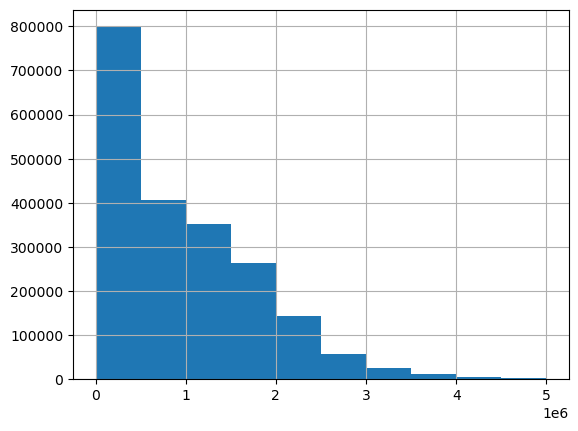

In [22]:
db.valid()[NBI_ELECTRON_POWER].hist()

<Axes: >

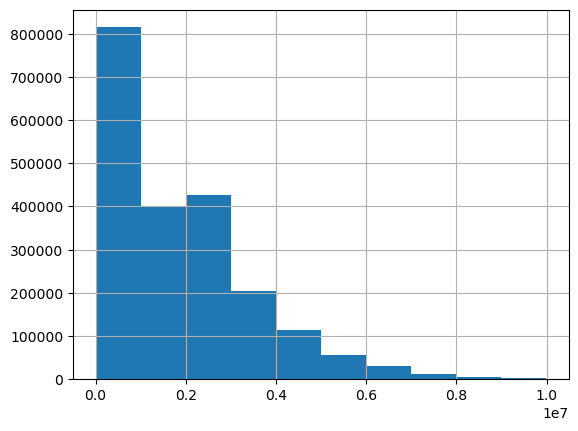

In [23]:
db.valid()[NBI_ION_POWER].hist()